# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [5]:
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

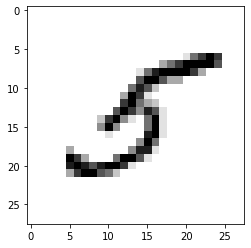

In [6]:
number = X[35].reshape(28,28)
plt.imshow(number, cmap = plt.cm.binary, interpolation = "nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [7]:
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [8]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [42]:
y_train_5 = [1 if i== '5' else 0 for i in y_train]
y_test_5 = [1 if i== '5' else 0 for i in y_test]
# y_train_5 = np.where(y_train == '5', 1, 0)
# y_test_5 = np.where(y_test == '5', 1, 0)


#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [46]:
model = LogisticRegression().fit(X_train, y_train_5)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Does the classifier predict correctly the 35th digit we picked before?

In [47]:
y_pred = model.predict(X_train)
y_pred[35]

1

Right prediction. It was 5 an we got a 1 (meaning its true)

#### The 36000th value is a 9. Check if it was correctly predicted.

In [48]:
y_pred[36000]
y[36000]

'9'

Predicted correctly that it wasn't a five!

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_5 = model.predict(X_test)
confusion_matrix(y_test_5,y_pred_5)
# print(classification_report(y_test_5,y_pred_5))

array([[9027,   81],
       [ 145,  747]], dtype=int64)

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [32]:
# Libraries
from sklearn.base import BaseEstimator

In [33]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [34]:
never_5_clf.fit(X_train)
never5_pred = never_5_clf.predict(X_test)

In [35]:
never5_pred

array([0., 0., 0., ..., 0., 0., 0.])

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_5,never5_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9108
           1       0.00      0.00      0.00       892

    accuracy                           0.91     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000



C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

The precision is better for the logistic regression, the recall is better for the dumbd classifier and for the f1 score the logistic regression is better

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [37]:
from sklearn.metrics import roc_curve
fpr_no_5, tpr_no_5, thresholds_no_5 = roc_curve(y_test_5,never5_pred)
print(fpr_no_5)
print(tpr_no_5)
print(thresholds_no_5)

[0. 1.]
[0. 1.]
[1. 0.]


In [38]:
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test_5,y_pred_5)
print(fpr_5)
print(tpr_5)
print(thresholds_5)

[0.         0.00889328 1.        ]
[0.         0.83744395 1.        ]
[2 1 0]


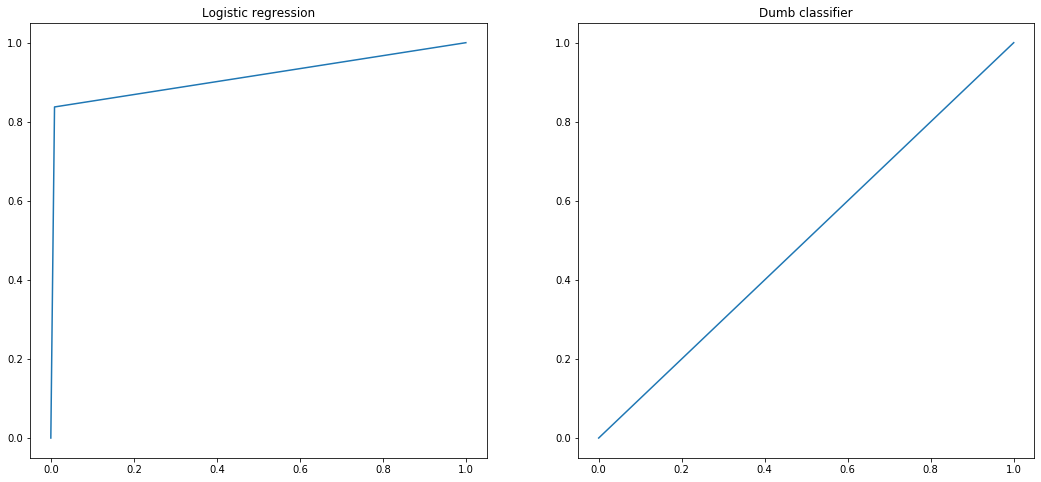

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.plot(fpr_5, tpr_5)
ax1.title.set_text('Logistic regression')
ax2.plot(fpr_no_5, fpr_no_5)
ax2.title.set_text('Dumb classifier')
plt.show()

#### Now find the roc_auc_score for each. 

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_5,never5_pred)

0.5

In [41]:
roc_auc_score(y_test_5,y_pred_5)

0.914275332777965

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here